
# Support Vector Machines with Radial Basis Functions (SVM-RBF)

This notebook provides an overview of Support Vector Machines (SVM) with Radial Basis Functions (RBF) as the kernel. We'll cover the background, how it works, and a basic implementation with multiple datasets and hyperparameter tuning.



## Background

Support Vector Machines (SVM) are supervised learning models used for classification and regression tasks. They work by finding the hyperplane that best separates the classes in the feature space.

The Radial Basis Function (RBF) kernel, also known as the Gaussian kernel, is a popular choice for non-linear data. It maps data into a higher-dimensional space where a linear separator can be found.



## Mathematical Foundation

### The SVM Optimization Problem

The objective of SVM is to find the hyperplane that best separates the classes:

\[
\text{Minimize } \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
\]

Subject to:

\[
y_i(w \cdot x_i + b) \geq 1 - \xi_i \quad \text{for all } i
\]

Where:
- \(w\) is the weight vector
- \(C\) is the regularization parameter
- \(\xi_i\) are the slack variables
- \(y_i\) are the class labels
- \(x_i\) are the feature vectors

### The RBF Kernel Function

The RBF kernel is defined as:

\[
K(x, x') = \exp(-\gamma \|x - x'\|^2)
\]

Where \(\gamma\) is a parameter that defines the influence of a single training example.



## Implementation in Python

We'll implement SVM with RBF kernel using Scikit-Learn on multiple datasets and demonstrate hyperparameter tuning.


Results for Iris Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



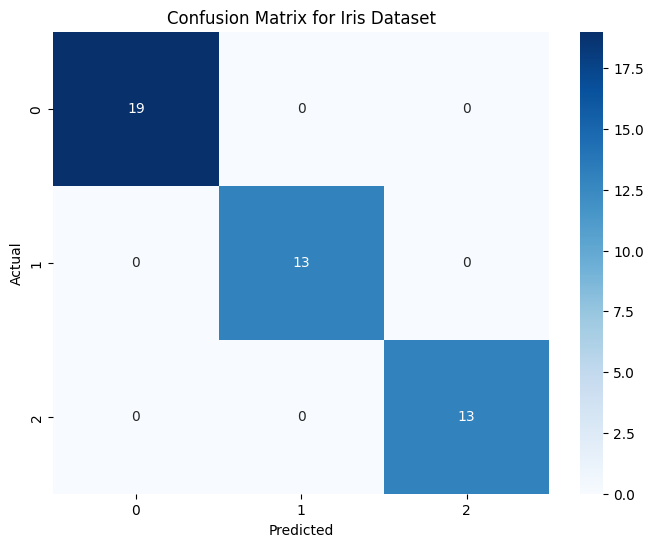

Results for Wine Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.63      0.90      0.75        21
           2       0.60      0.21      0.32        14

    accuracy                           0.76        54
   macro avg       0.74      0.71      0.69        54
weighted avg       0.75      0.76      0.72        54



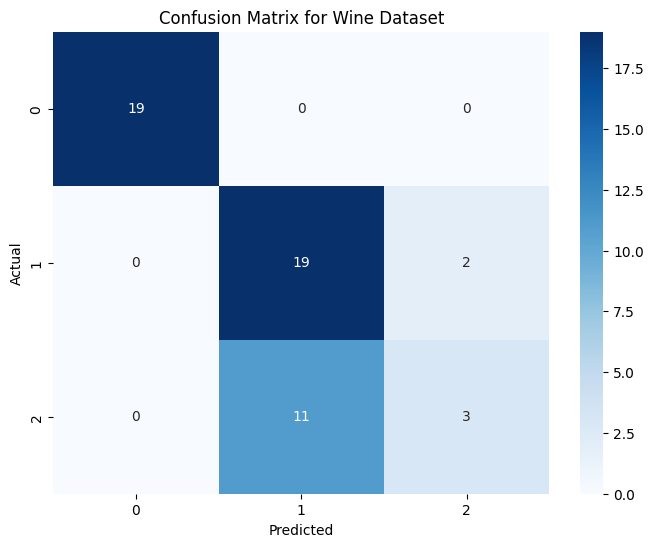

Results for Digits Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



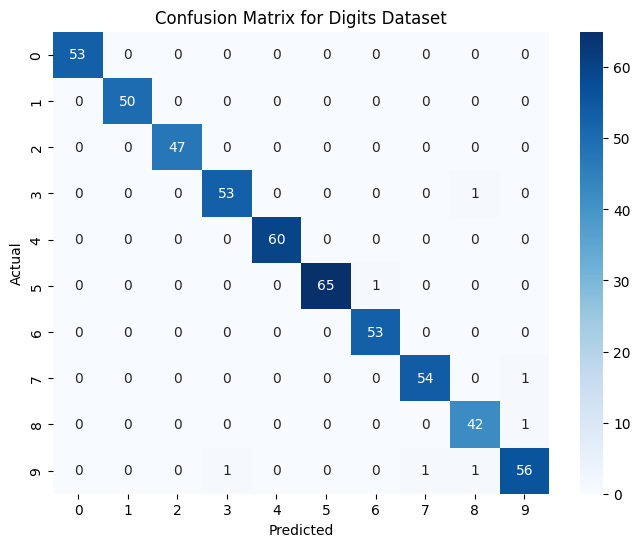

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Load datasets
iris = datasets.load_iris()
wine = datasets.load_wine()
digits = datasets.load_digits()

datasets_list = [(iris, "Iris"), (wine, "Wine"), (digits, "Digits")]

for dataset, name in datasets_list:
    X = dataset.data
    y = dataset.target

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the SVM model with RBF kernel
    model = SVC(kernel='rbf', gamma='scale')

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Results for {name} Dataset:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, f"Confusion Matrix for {name} Dataset")




## Hyperparameter Tuning

We'll perform hyperparameter tuning using GridSearchCV to find the best values for C and gamma.


In [ ]:
# Perform GridSearchCV on the Iris dataset
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(iris.data, iris.target)

# Print the best parameters and estimator
print("Best Parameters for Iris Dataset:", grid.best_params_)
print("Best Estimator for Iris Dataset:", grid.best_estimator_)

# Evaluate the tuned model
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix for the tuned model
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix for Tuned Model on Iris Dataset")


## Conclusion

In this notebook, we've explored the SVM-RBF model, covering its background, mathematical foundation, implementation on multiple datasets, and hyperparameter tuning.
